In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join

%matplotlib inline

names of the views from mySQL


In [ ]:
#community_mobile_vs_internet_users
#democracy_vs_subs
#most_free_and_democratic_countries
#ststs_for_highest_internet_usage_country
#ststs_for_lowest_internet_usage_country

the mySQL views are exported from github

# COMMUNITY MOBILE VS. INTERNET USERS 



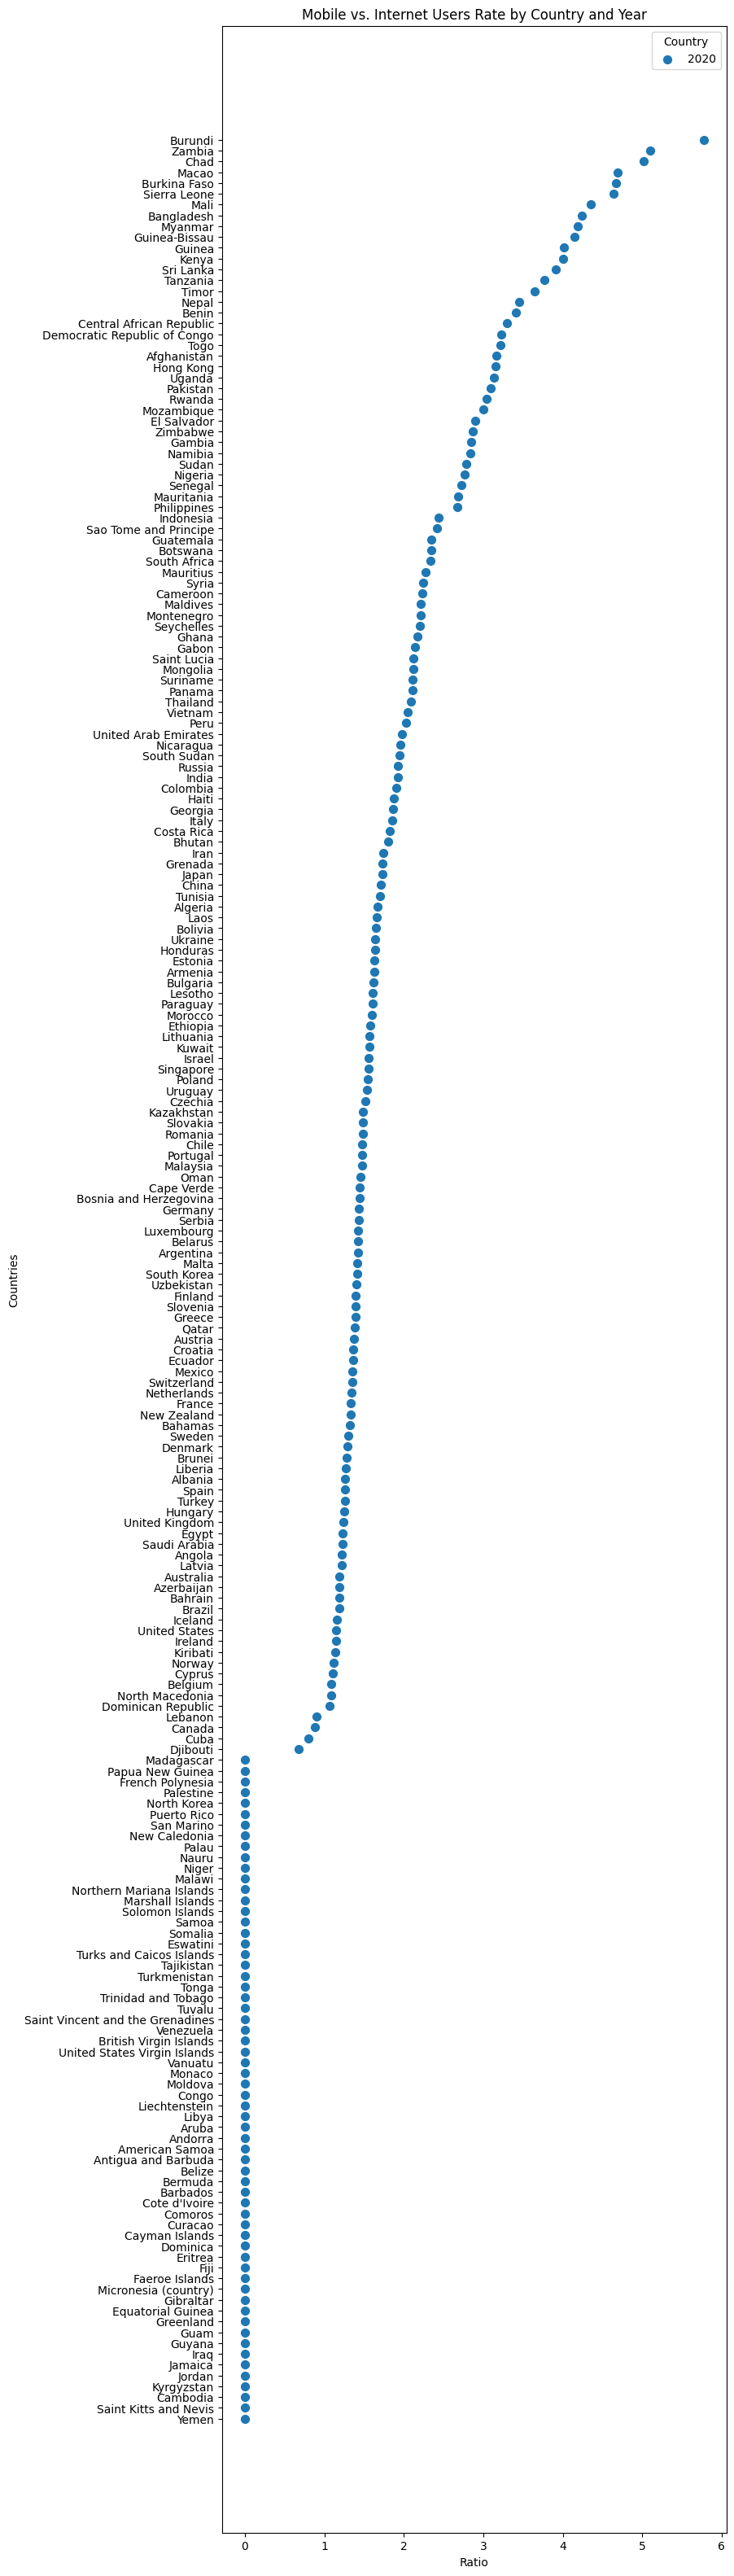

In [ ]:
url= 'https://raw.githubusercontent.com/tansylu/view-dumps/main/community_mobile_vs_internet_users.csv'
df = pd.read_csv(url, on_bad_lines='skip', sep=";")
df = df.sort_values(by='Mobile_vs_Internet')
grouped_df = df.groupby('Year')

# Create a scatter plot for each country
fig, ax = plt.subplots(figsize=(8,40))

for name, group in grouped_df:
    group.plot(x='Mobile_vs_Internet', y='Country_name', ax=ax, label=name, kind='scatter', s=50)
ax.set_xlabel('Ratio')
ax.set_ylabel('Countries')
ax.set_title('Mobile vs. Internet Users Rate by Country and Year')

ax.legend(title='Country')

plt.show()

# DEMOCRACY VS. SUBSCRIPTIONS

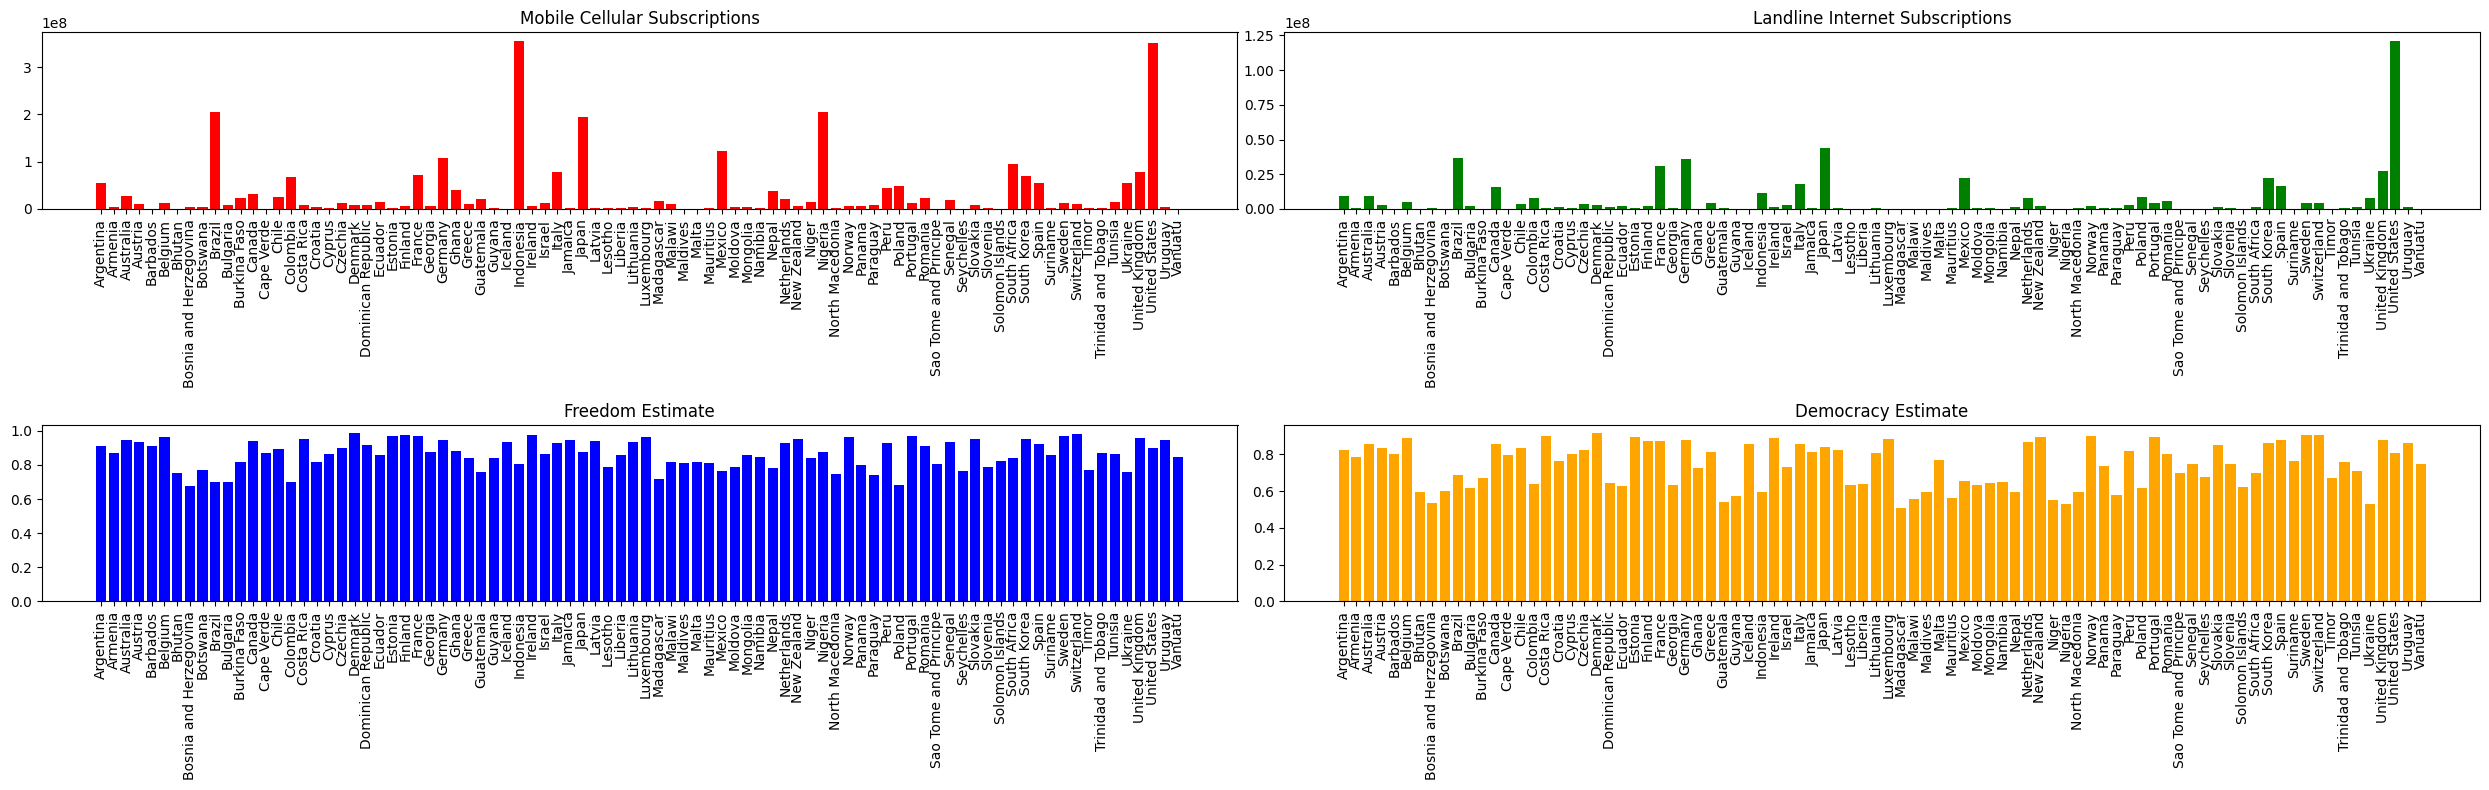

In [ ]:
url= 'https://raw.githubusercontent.com/tansylu/view-dumps/main/democracy_vs_subs.csv'
df = pd.read_csv(url, on_bad_lines='skip', sep=";")

grouped = df.groupby('Country_name')

fig, axs = plt.subplots(2, 2, figsize=(25, 8))

# Create a subplot for each variable
axs[0, 0].bar(grouped.groups.keys(), grouped['Mobile_cellular_subscriptions'].last(), color='red')
axs[0, 0].set_title('Mobile Cellular Subscriptions')
axs[0, 0].tick_params(axis='x', rotation=90)

axs[0, 1].bar(grouped.groups.keys(), grouped['Landline_internet_subscriptions'].last(), color='green')
axs[0, 1].set_title('Landline Internet Subscriptions')
axs[0, 1].tick_params(axis='x', rotation=90)

axs[1, 0].bar(grouped.groups.keys(), grouped['Freedom_estimate'].last(), color='blue')
axs[1, 0].set_title('Freedom Estimate')
axs[1, 0].tick_params(axis='x', rotation=90)

axs[1, 1].bar(grouped.groups.keys(), grouped['Democracy_estimate'].last(), color='orange')
axs[1, 1].set_title('Democracy Estimate')
axs[1, 1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


MOST FREE AND DEMOCRATIC COUNTRIES

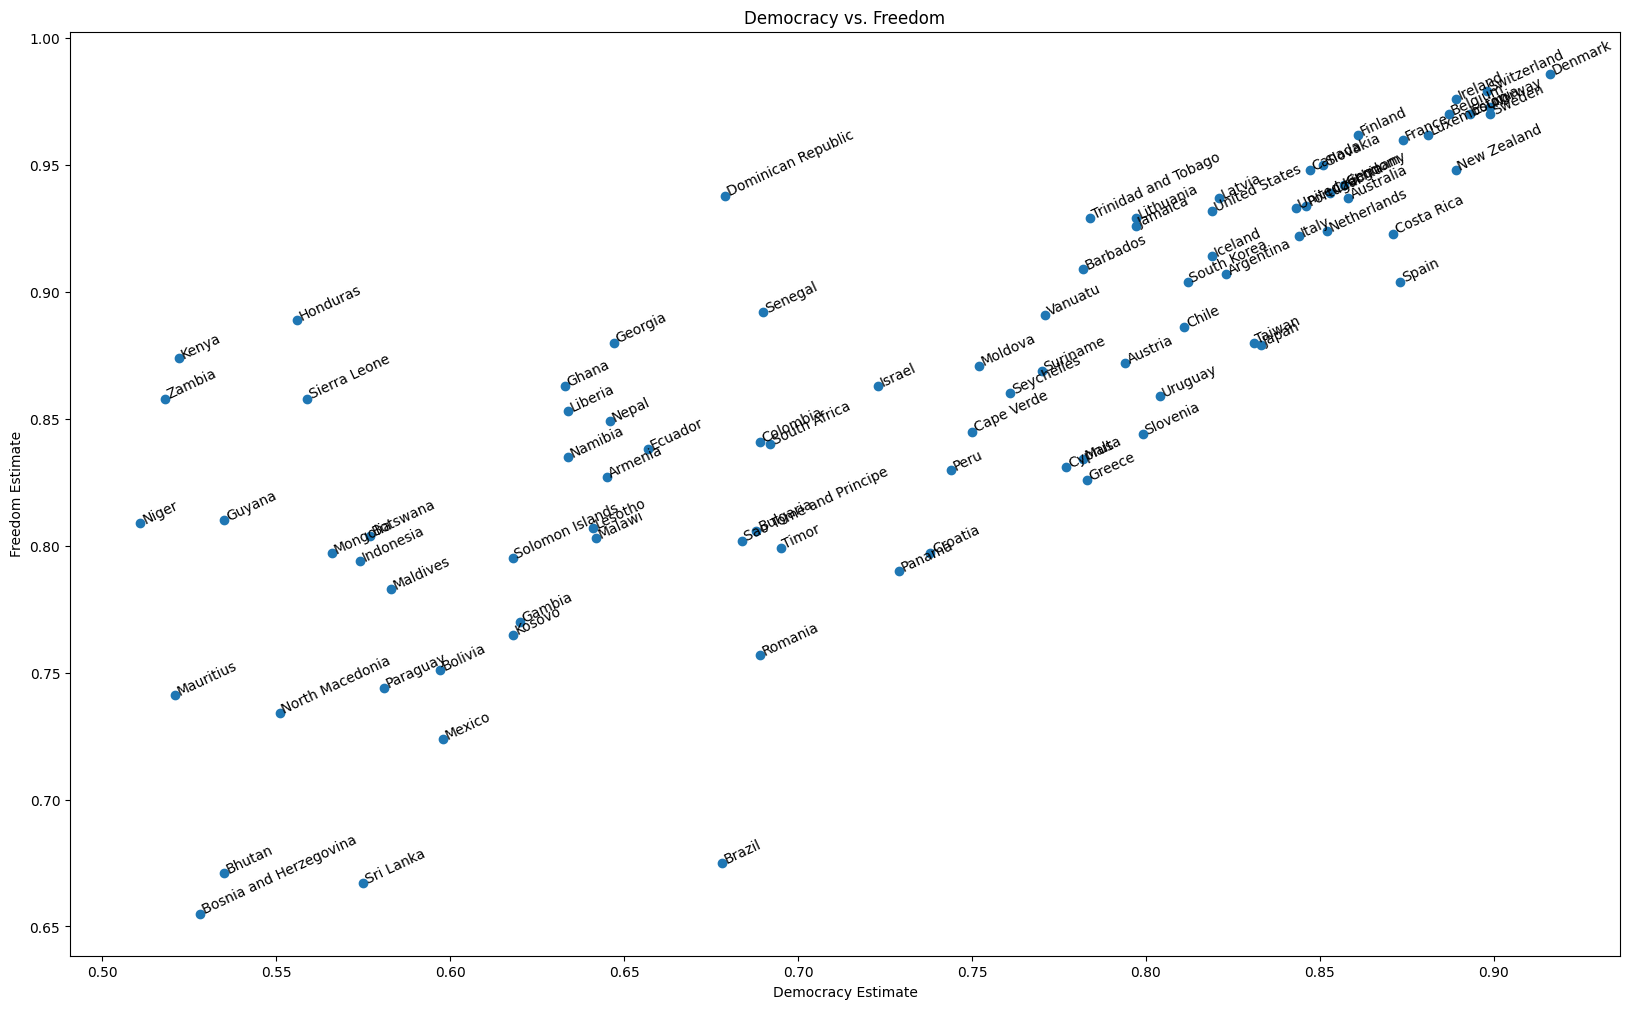

In [ ]:
url= 'https://raw.githubusercontent.com/tansylu/view-dumps/main/most_free_and_democratic_countries.csv'
df = pd.read_csv(url, on_bad_lines='skip', sep=";")

plt.figure(figsize = (20,12))
plt.scatter(df['Democracy_estimate'], df['Freedom_estimate'])
plt.title('Democracy vs. Freedom')
plt.xlabel('Democracy Estimate')
plt.ylabel('Freedom Estimate')

# Add labels for each point
for i, row in df.iterrows():
    plt.annotate(row['Country_name'], (row['Democracy_estimate'], row['Freedom_estimate']),rotation = 25)

# Show the scatter plot
plt.show()

# STATS FOR HIGHEST INTERNET USAGE FOR COUNTRIES





Text(0.5, 1.0, 'Distribution of GDP Values across Countries')

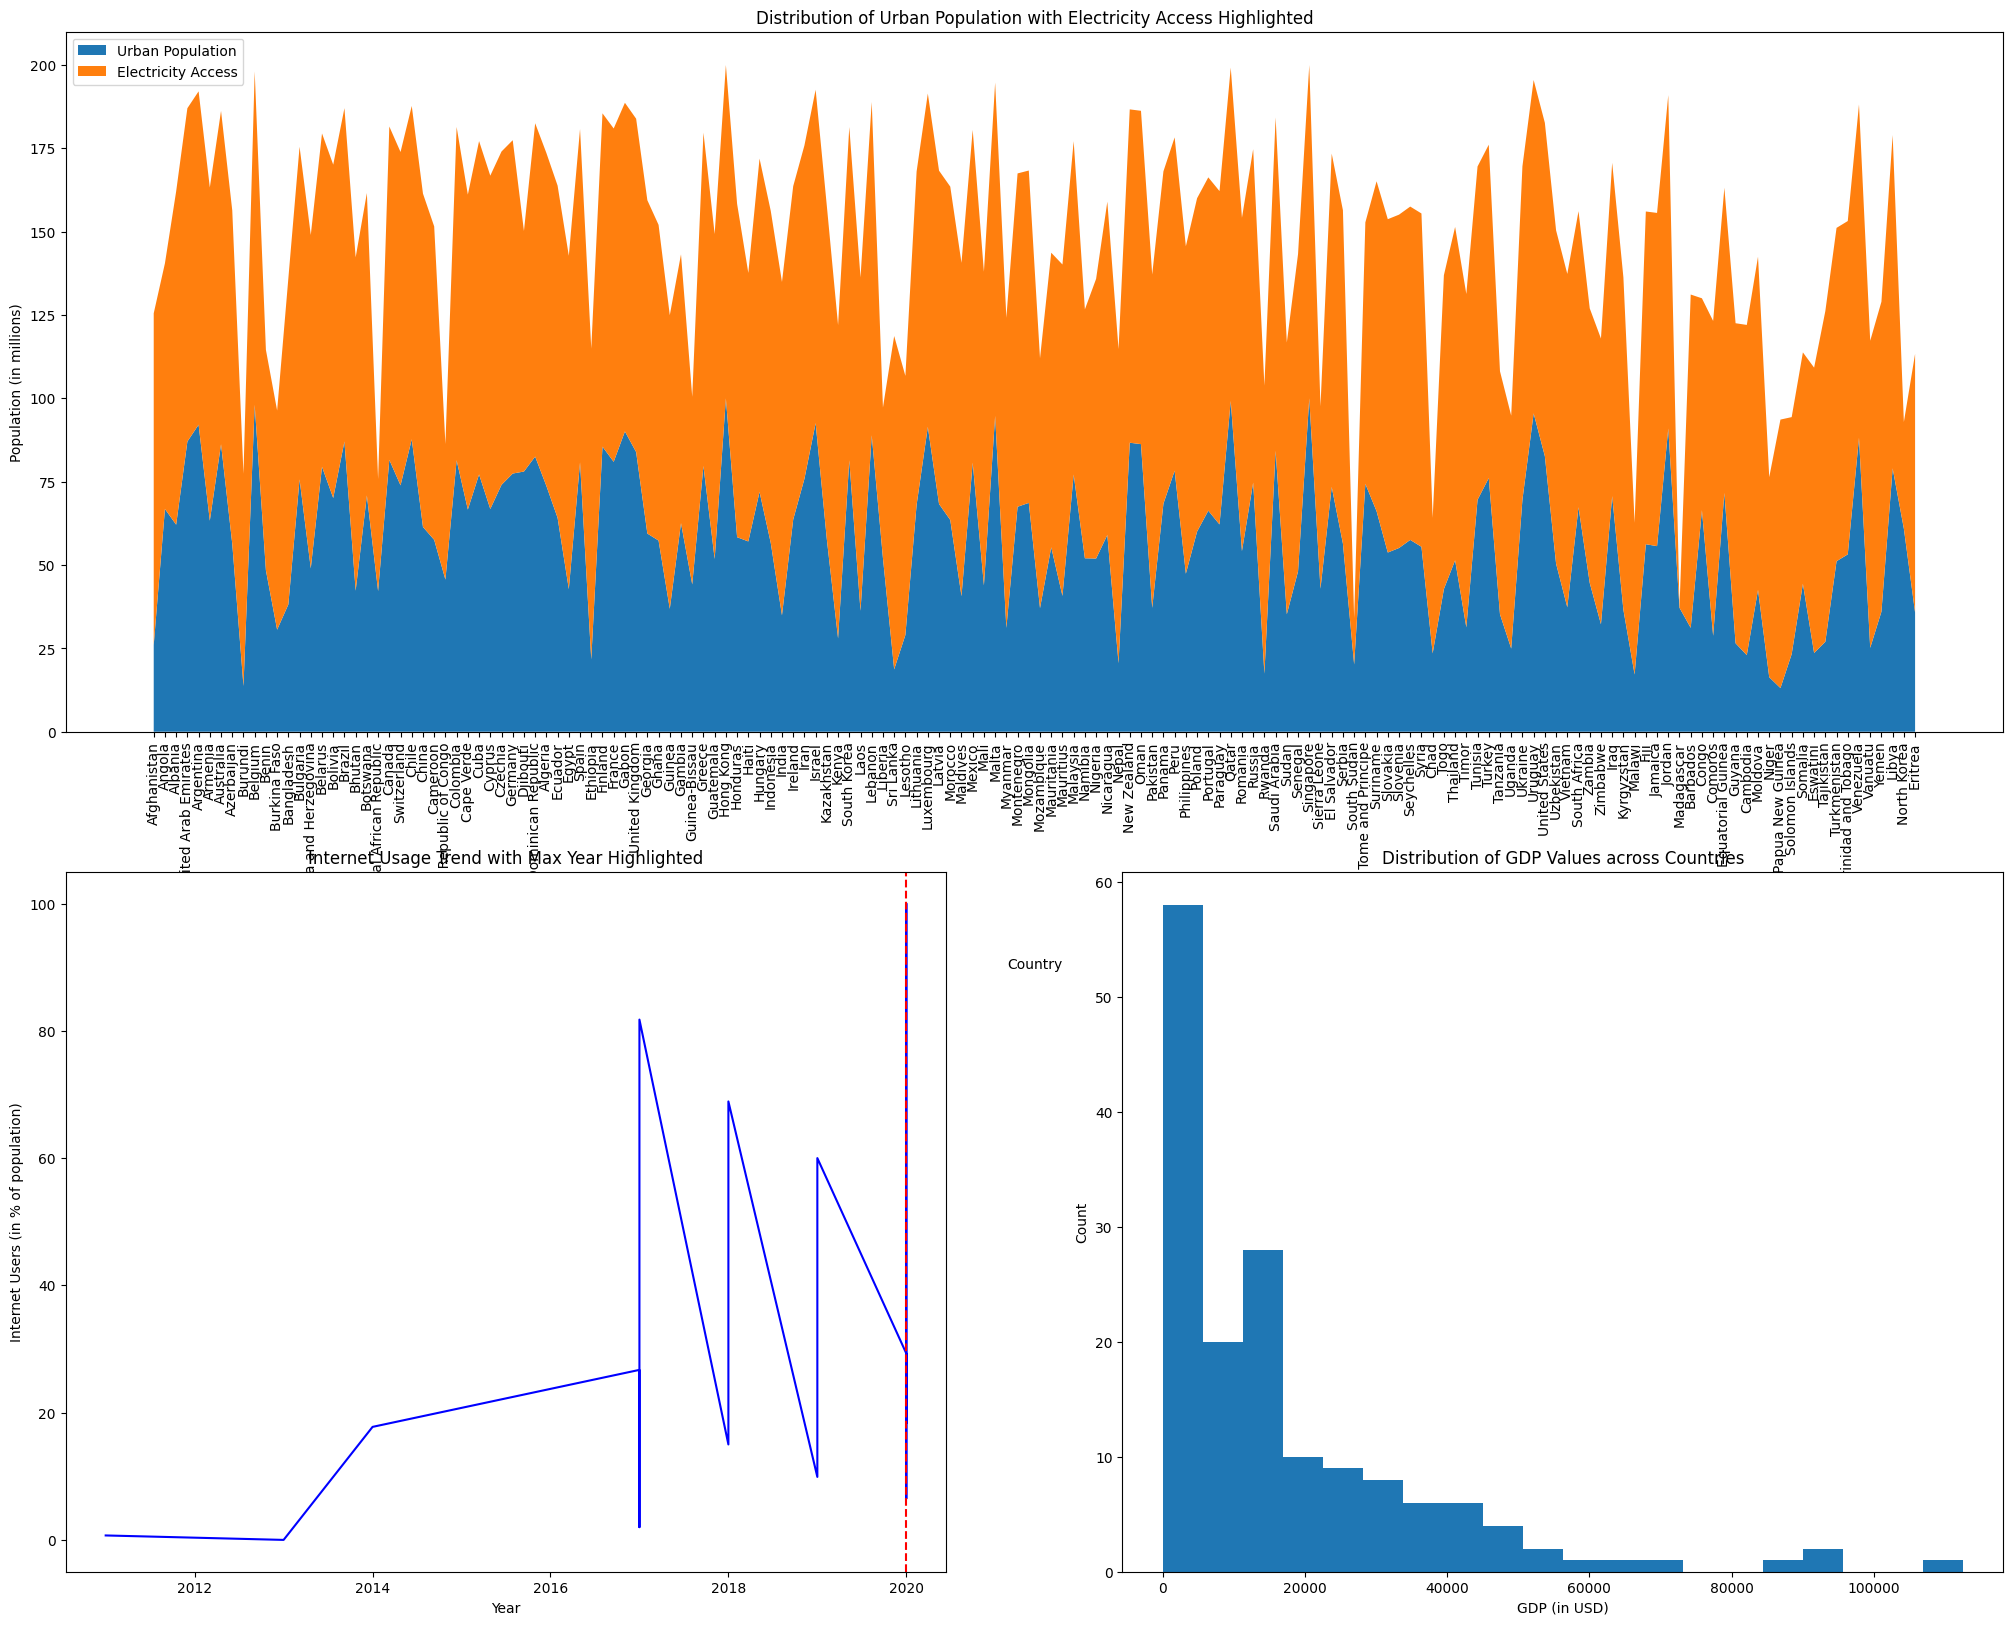

In [ ]:
url= 'https://raw.githubusercontent.com/tansylu/view-dumps/main/stats_for_highest_internet_usage_country.csv'
df = pd.read_csv(url, on_bad_lines='skip', sep=";")
plt.figure(figsize = (25,20))

plt.subplot(2, 1, 1)
plt.stackplot(df['Country_name'], df['Urban_population'], df['Electricity_access_urban'], labels=['Urban Population', 'Electricity Access'])
plt.legend(loc='upper left')
plt.xlabel('Country')
plt.ylabel('Population (in millions)')
plt.title('Distribution of Urban Population with Electricity Access Highlighted')
plt.tick_params(axis='x', rotation=90)    

plt.subplot(2, 2, 3)
plt.plot(df['max_internet_users_year'], df['Internet_users'], color='blue')
plt.axvline(df['max_internet_users_year'].iloc[0], color='red', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Internet Users (in % of population)')
plt.title('Internet Usage Trend with Max Year Highlighted')

plt.subplot(2, 2, 4)
plt.hist(df['GDP'], bins=20)
plt.xlabel('GDP (in USD)')
plt.ylabel('Count')
plt.title('Distribution of GDP Values across Countries')

STATS FOR LOWEST INTERNET USAGE COUNTRY

In [ ]:
url= 'https://raw.githubusercontent.com/tansylu/view-dumps/main/stats_for_lowest_internet_usage_country.csv'
df = pd.read_csv(url, on_bad_lines='skip', sep=";")
df.head()

,Code,Country_name,Internet_users,min_internet_users_year,Urban_population,Electricity_access_urban,GDP
0,SSD,South Sudan,2.200000,2013,18.415001,11.084397,0.00
1,TLS,Timor,0.099032,2005,26.041000,77.579170,2271.54
2,MNE,Montenegro,25.350069,2004,62.126999,100.000000,13505.00
3,SRB,Serbia,23.500000,2004,53.660999,100.000000,11599.70
4,AFG,Afghanistan,0.004561,2002,22.261000,75.063278,1904.56


In [ ]:
#!pip install geopandas

import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.name!="Antarctica")]
world.head()

<ipython-input-12-f10c51d91205>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


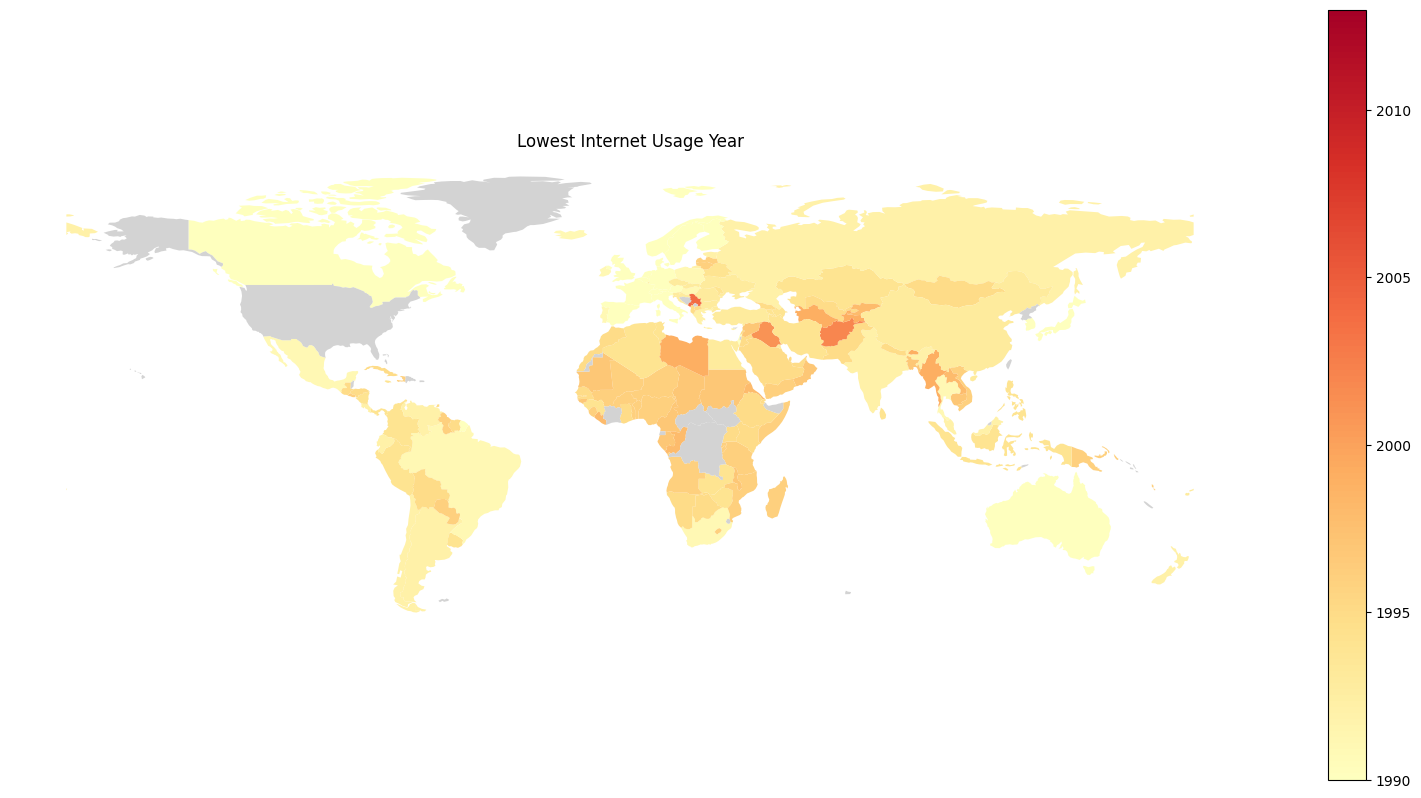

In [ ]:
df3=df[["Country_name","min_internet_users_year"]].copy()
df3.rename(columns={"Country_name":"name"},inplace=True)
import matplotlib.colors as colors
cmap = plt.get_cmap('RdYlGn')

cmap = colors.ListedColormap(cmap(np.linspace(0, 0.5, cmap.N))[::-1])

merged = pd.merge(world,df3,on = "name",how="outer")
merged.plot(column='min_internet_users_year', figsize=(20, 10), legend=True,missing_kwds={'color': 'lightgrey'},cmap=cmap).set_axis_off()

plt.title("Lowest Internet Usage Year")
plt.show()